In [2]:
%load_ext autoreload
%autoreload 2

import FMCA
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import make_axes_locatable


import sys
import os

from src.kde import *
from src import cdf
from src.pinball_crps import *

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


KernelMatrix

In [3]:
xtrain = np.load("data/data_21_23.npy")
# data 2023 test data
xtest=xtrain[365:,:]
# data 2021 train data
xtrain=xtrain[0:366,:]
# m rows
m=xtrain.shape[0]
# n columns
n=xtrain.shape[1]

Kernel Hour wise

In [4]:
# select hour of interest
n=8

KernelMeanEmbedding

In [5]:
xtrain_n=xtrain[1:, n].reshape(1,m-1)
xtest_n=xtest[1:, n]
# get mean and sigma of train data for selected hour n
mu=np.mean(xtrain_n)
sigma=np.std(xtrain_n)

In [6]:
# set Kde
Kernel=Kde("Exponential", 1)

In [7]:
# compute Kme
Kernel.Kme(xtrain_n)

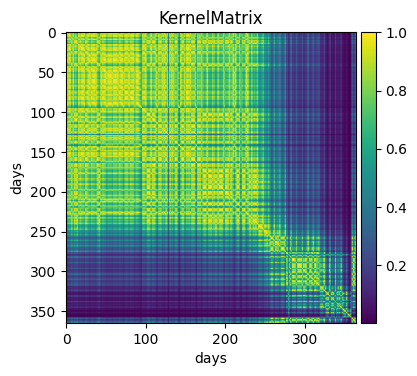

In [8]:
Kernel.PlotKmatrix(xtrain_n)

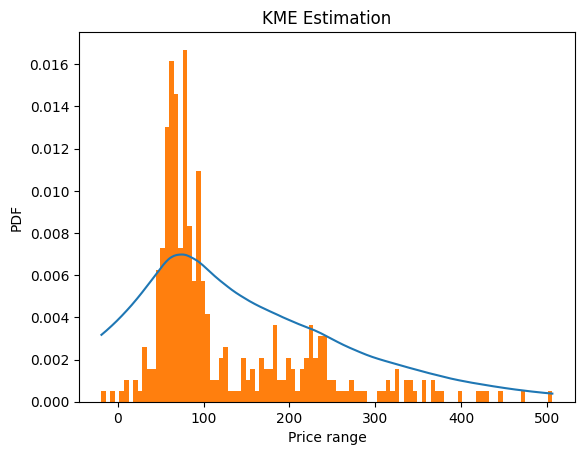

In [9]:
Kernel.PlotKde()

In [13]:
# random sample as many elements as size of test data
np.random.seed(10)
unif=np.random.uniform(0,1,xtrain_n.size)


# simulate data based on the kde learned from train data
x_sample=[cdf.inv_cdf_funct(unif[i], xtrain_n) for i in range(len(unif))]
x_sample=np.array(x_sample)

Text(0.5, 1.0, 'Simulated Data vs Observed Data')

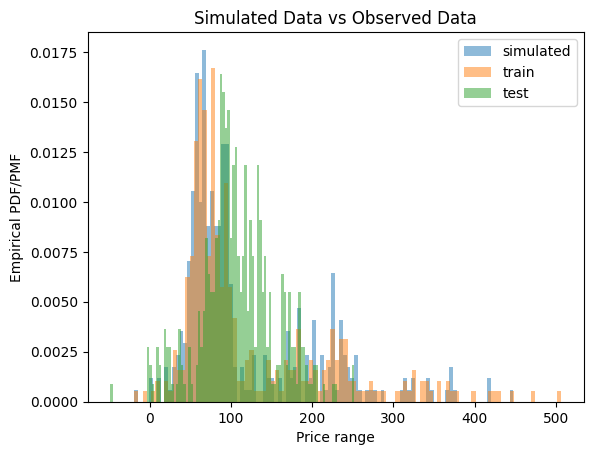

In [14]:
plt.hist(x_sample, density=True, bins=100, alpha=0.5, label="simulated");

plt.hist(Kernel.data, bins=100, density=True, alpha=0.5, label="train");
plt.hist(xtest_n, bins=100, density=True, alpha=0.5, label="test");

plt.xlabel("Price range")
plt.ylabel("Empirical PDF/PMF")
plt.legend()
plt.title("Simulated Data vs Observed Data")

CPRS

In [15]:
CRPS(x_sample, xtest_n)

9.864509363858135

In [17]:
x_sample_rpol=np.load("data/simulations/sim_rpol.npy")
x_sample_bspl=np.load("data/simulations/sim_bspl_sub.npy")
x_sample_spl_rpol=np.load("data/simulations/sim_spl_rpol.npy")
x_sample_kernel_herding=np.load("data/simulations/sim_kernel_herding.npy")

print("rpol", CRPS(x_sample_rpol, xtest_n))
print("bspl", CRPS(x_sample_bspl, xtest_n))
print("spl_rpol", CRPS(x_sample_spl_rpol, xtest_n))
print("kernel_herding", CRPS(x_sample_kernel_herding, xtest_n))

rpol 10.748796020882477
bspl 10.812242402108875
spl_rpol 10.818400771142809
kernel_herding 11.009800137115741
